In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import json
import pickle 
from arimafd import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.signal import argrelextrema
plt.rcParams['figure.figsize'] = 14 , 6

In [2]:
import pandas as pd
import glob

all_files=[]
import os
for root, dirs, files in os.walk(r'data/'):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))
with open(r'labels\combined_windows.json') as tt:
    accidents= json.load(tt)
accidents[all_files[0][5:].replace('\\','/')]



[]

In [3]:
sum1=0
for i in range(len(accidents)):
    sum1+=len(accidents[all_files[i][5:].replace('\\','/')])

In [4]:
with open(r'C:\data\pickle_arima\numenta\tensors.pickle', 'rb') as handle:
    list_of_tensor = pickle.load(handle)

C:\Users\kompn\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


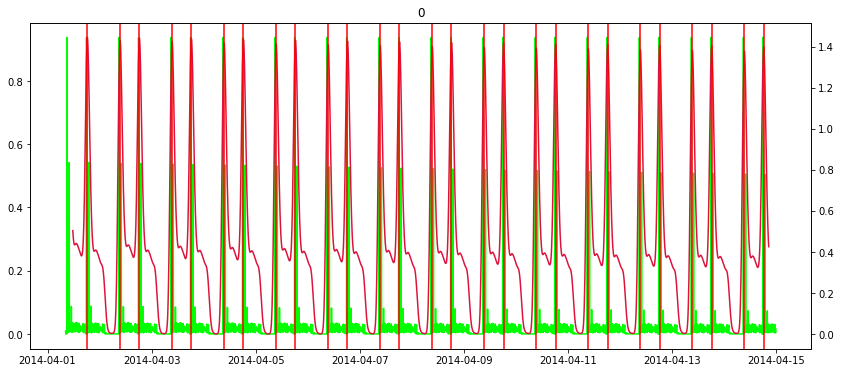

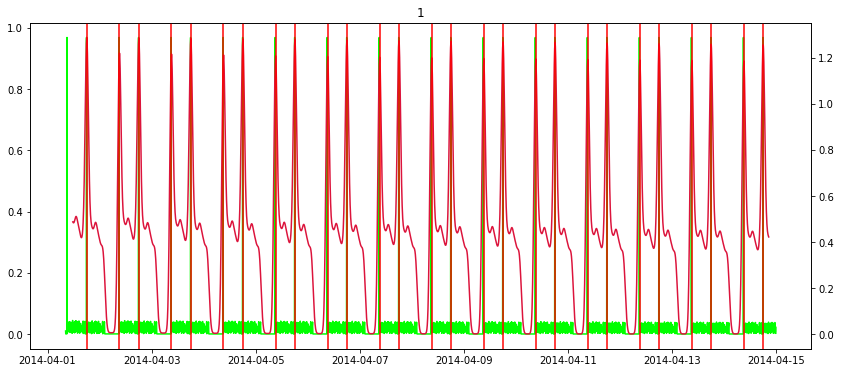

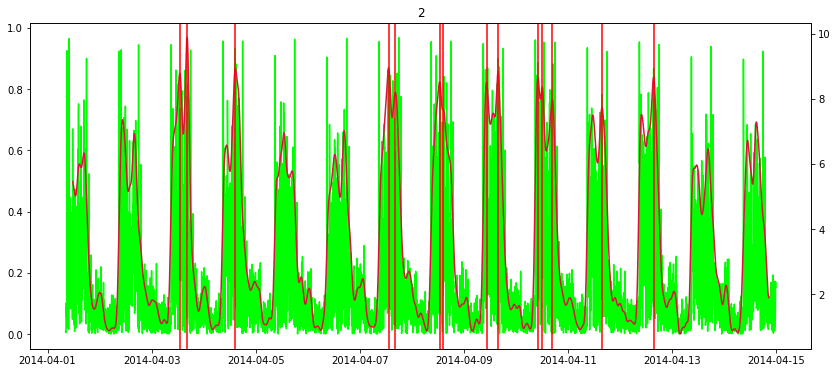

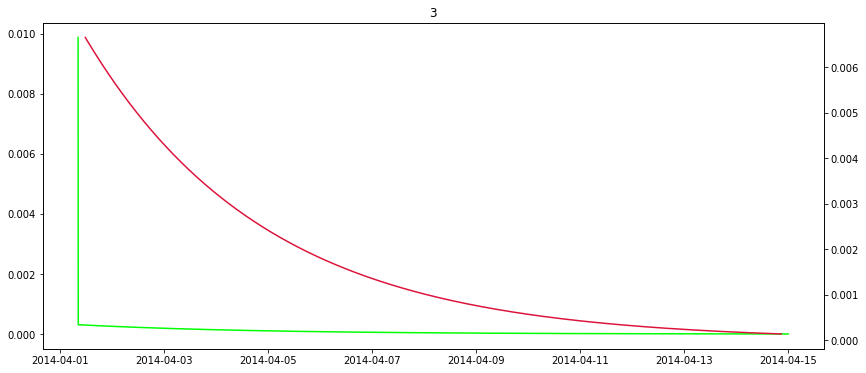

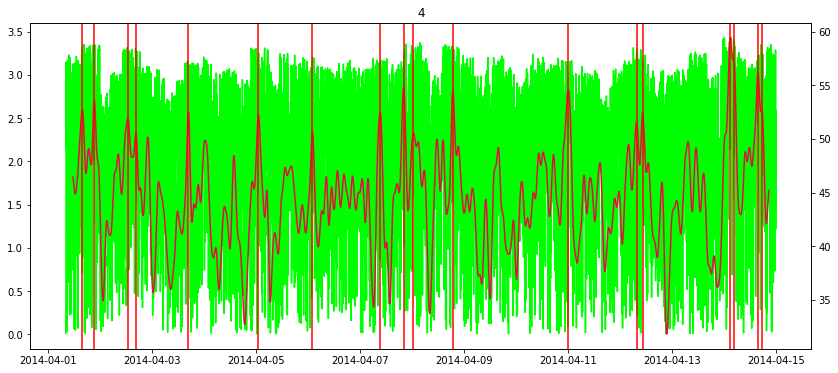

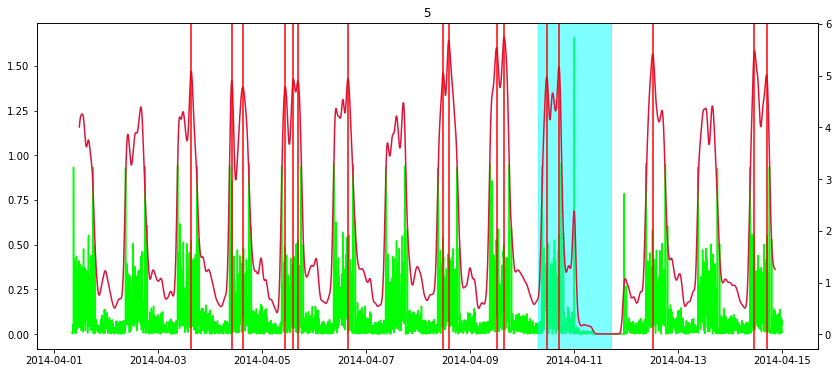

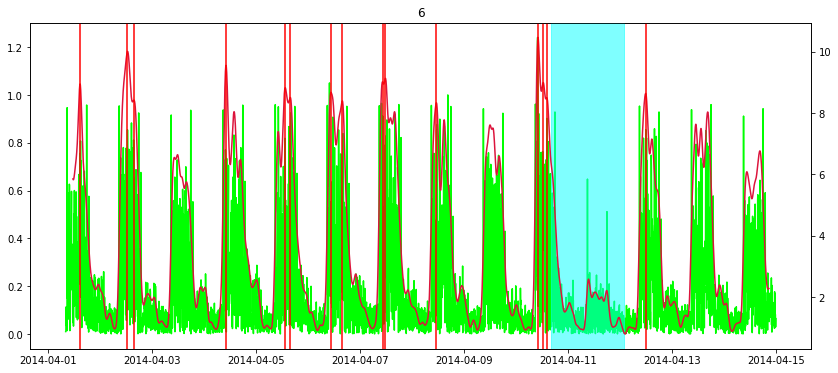

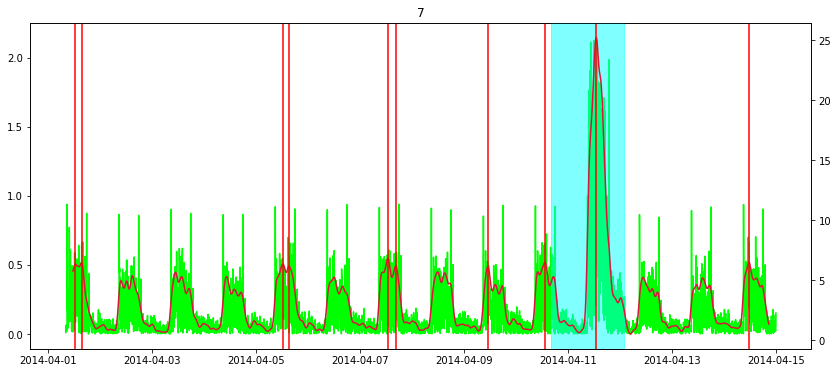

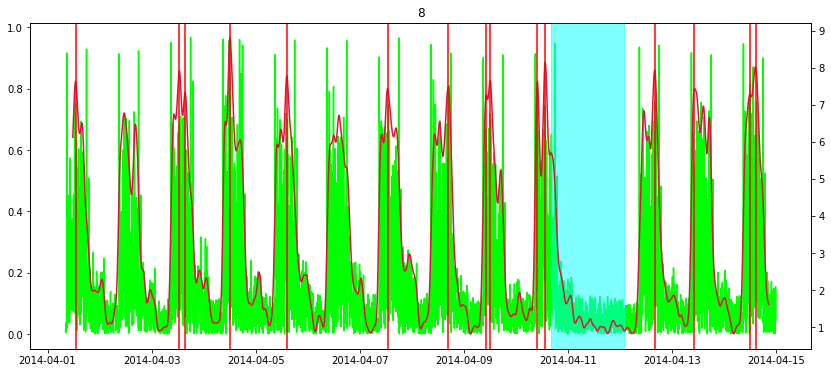

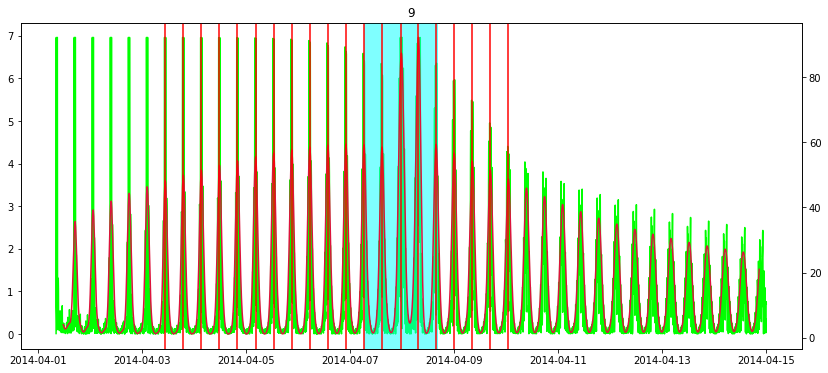

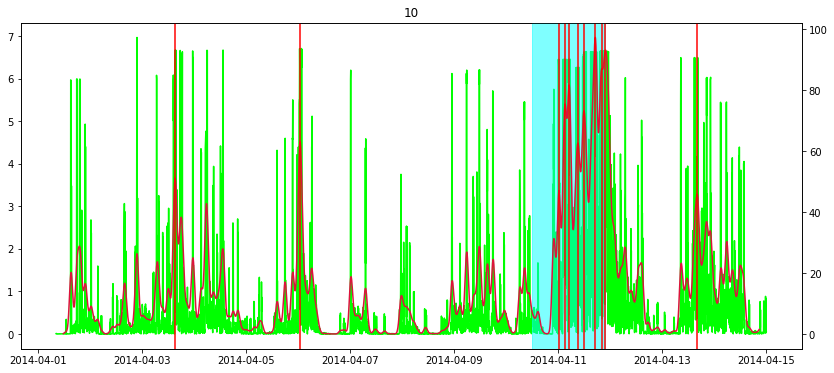

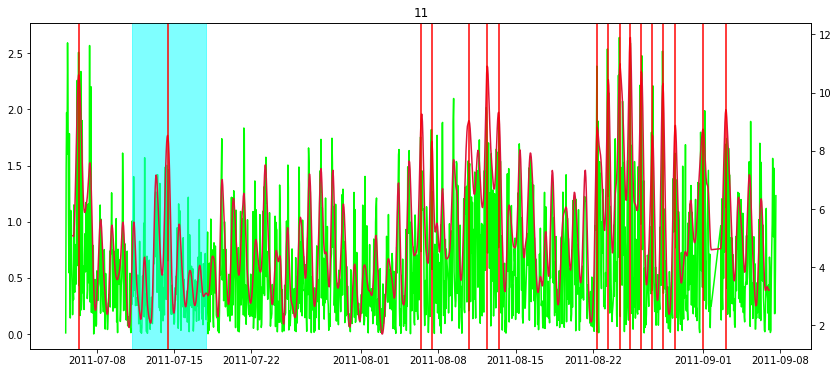

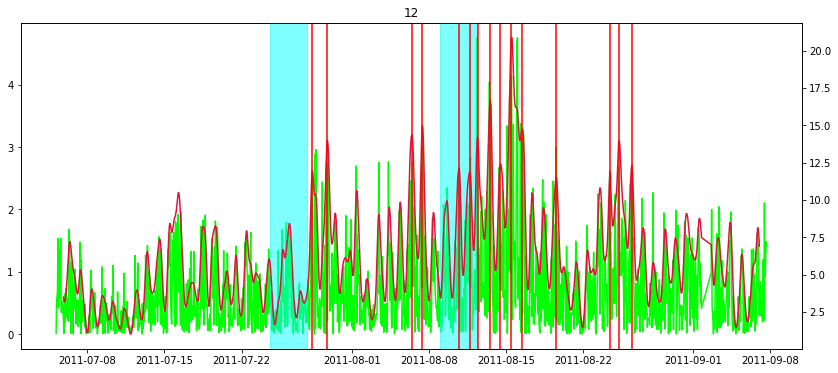

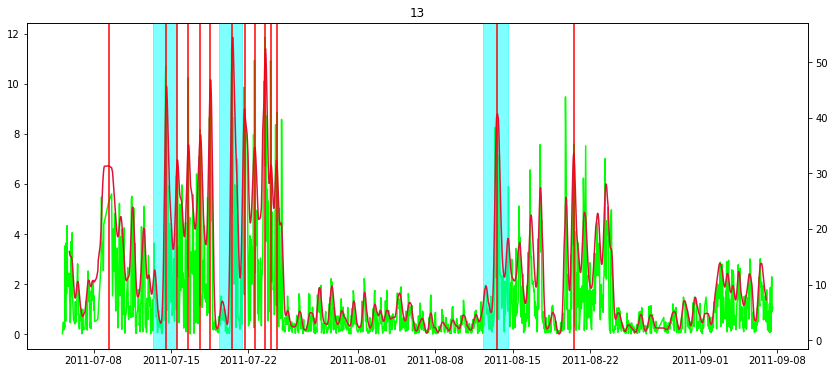

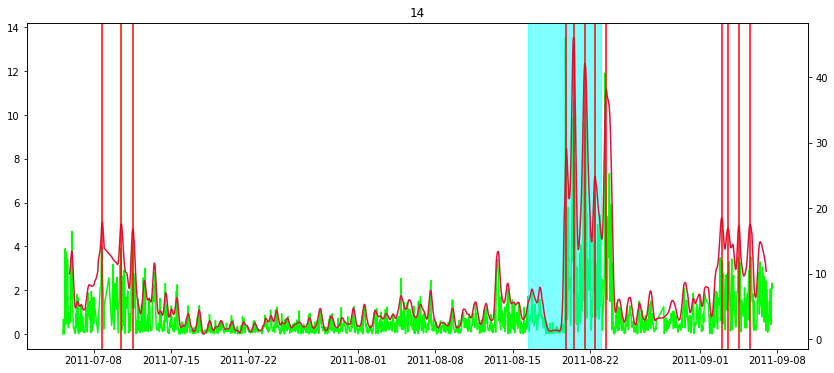

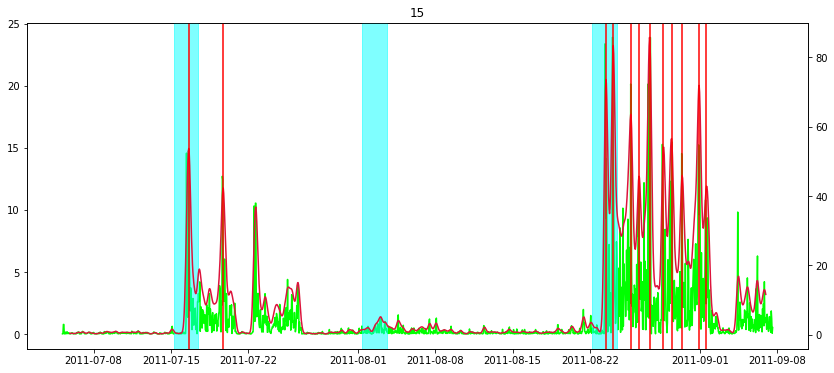

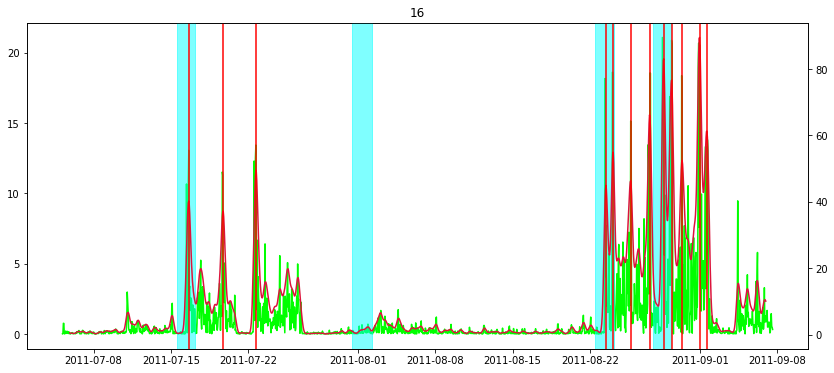

большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды


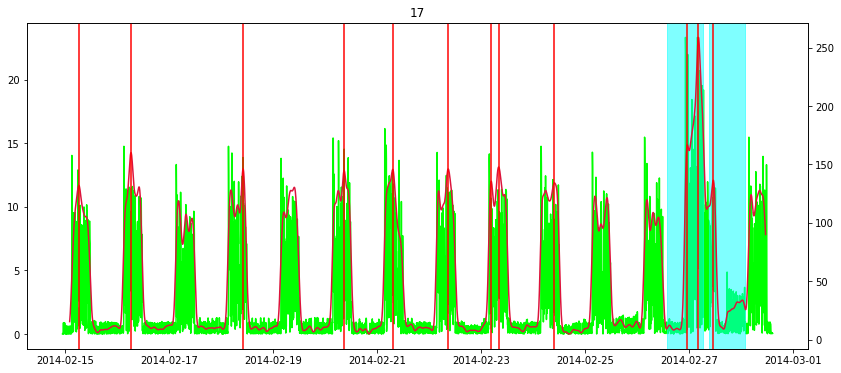

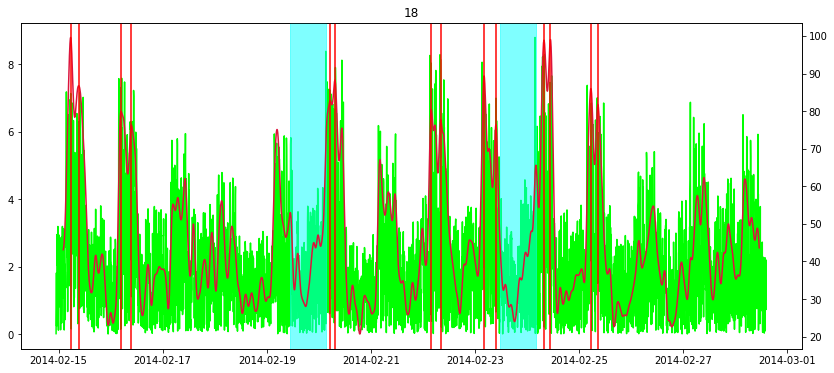

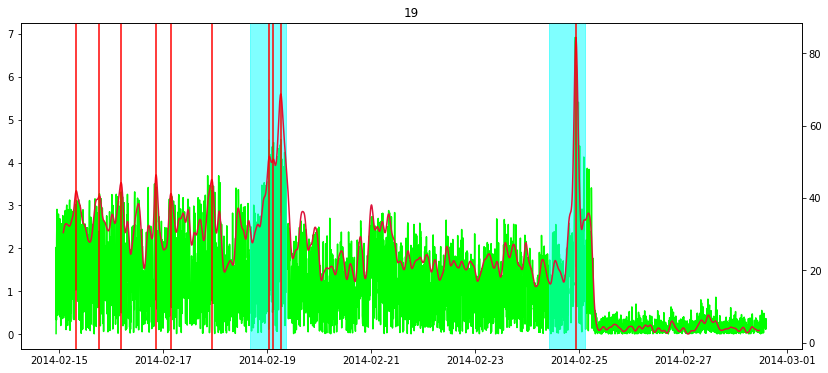

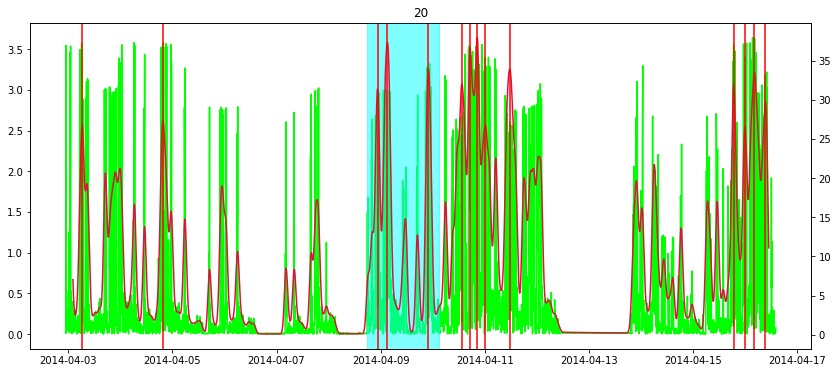

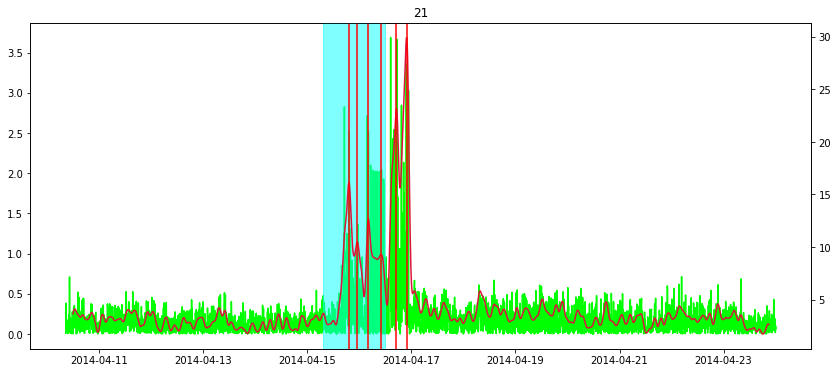

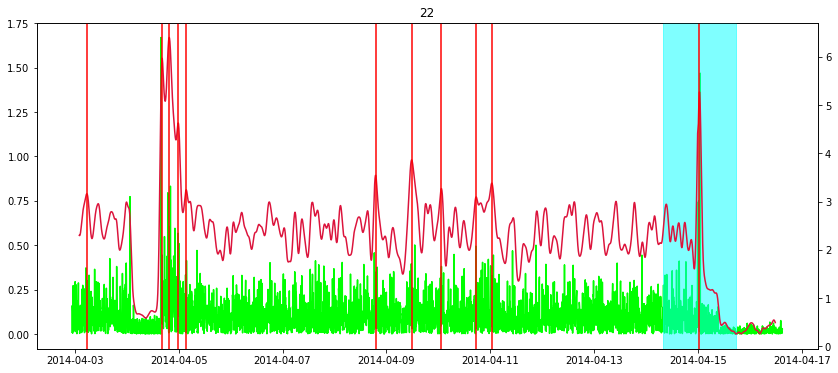

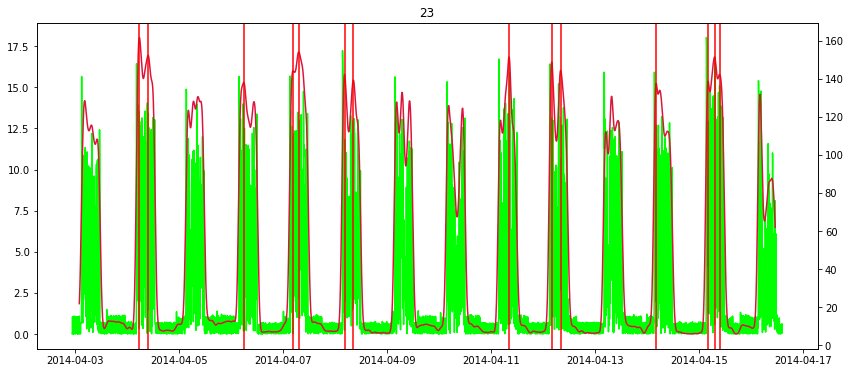

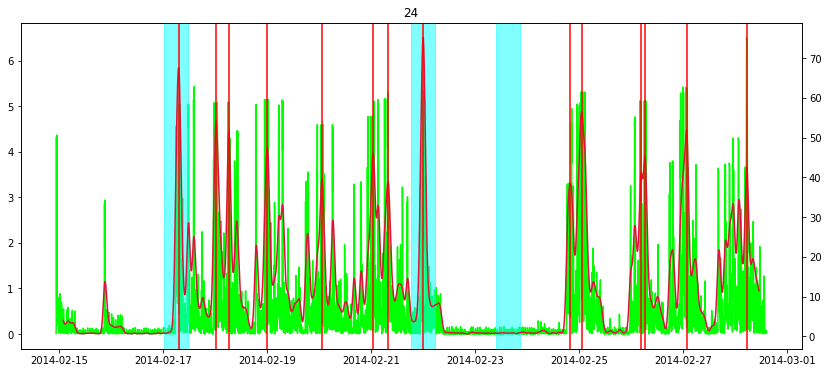

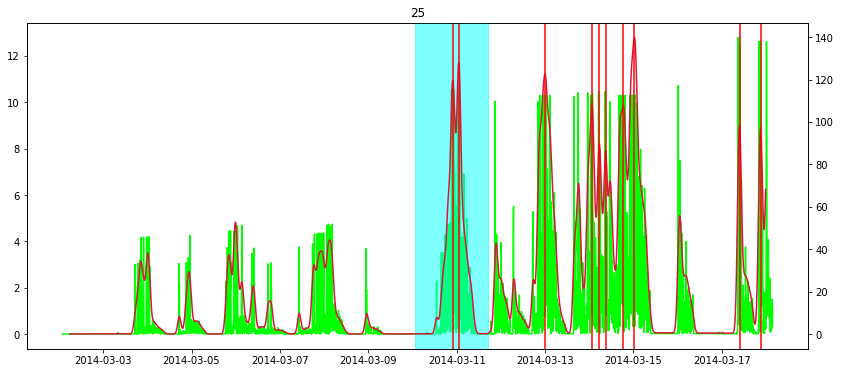

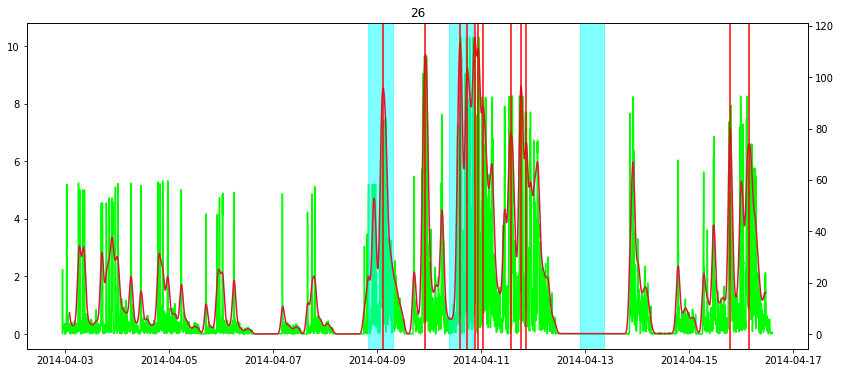

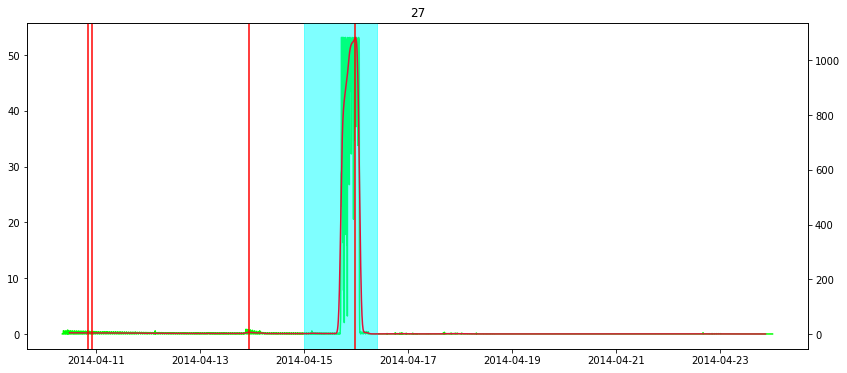

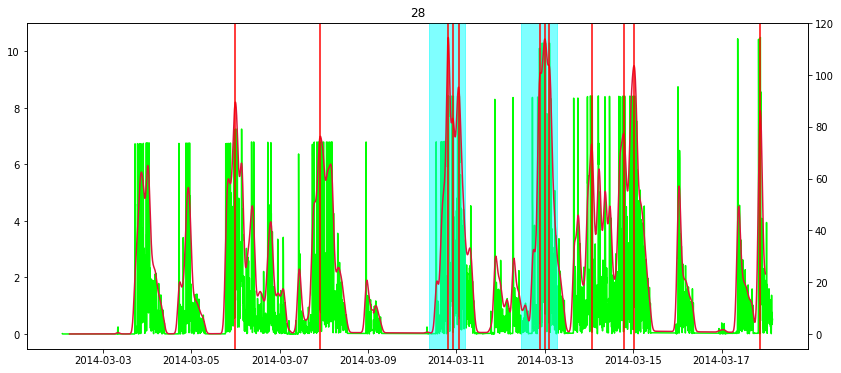

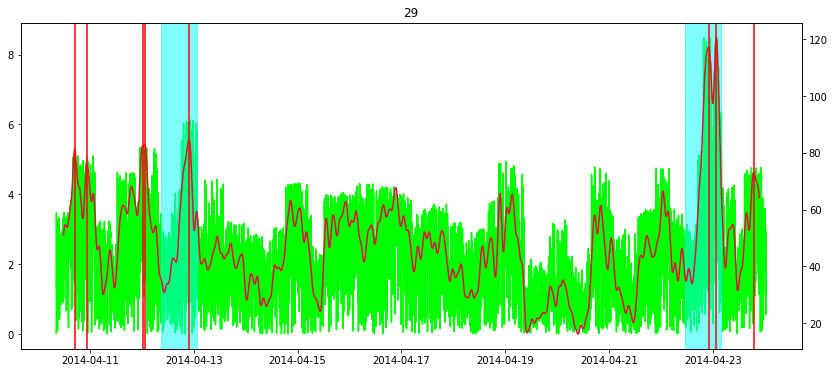

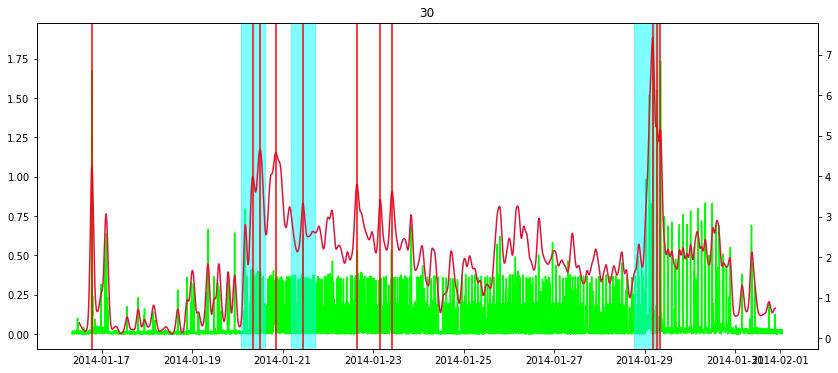

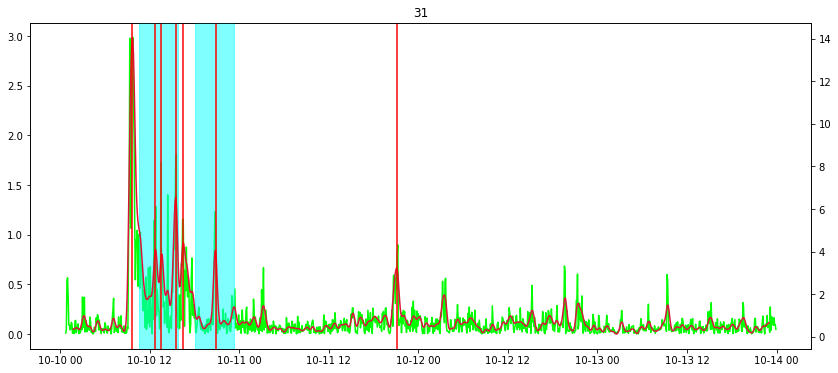

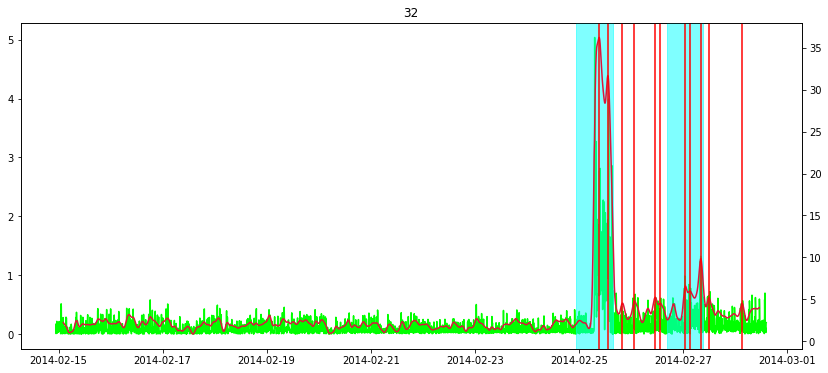

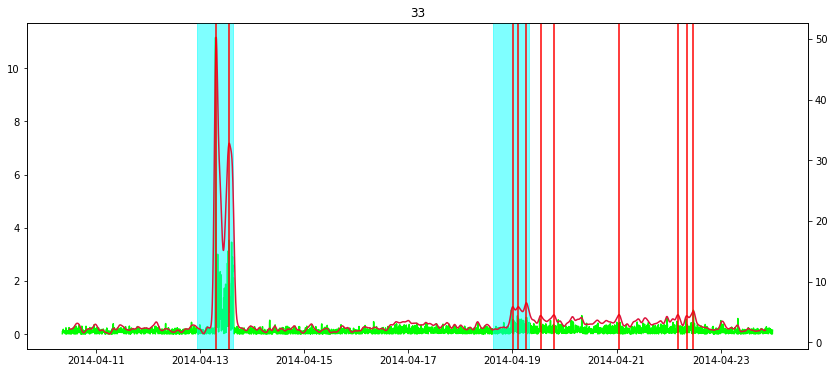

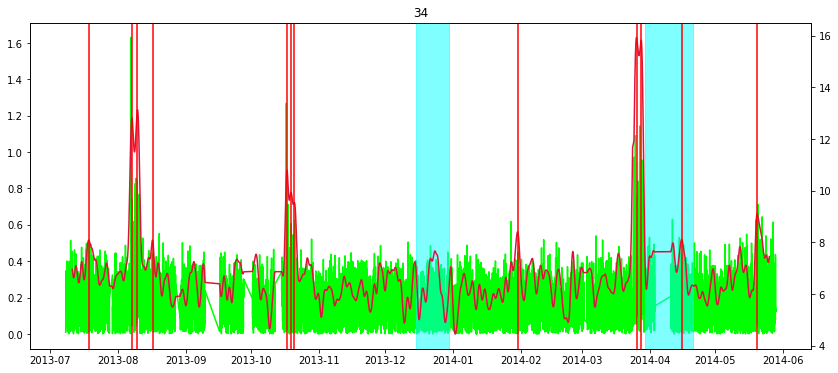

большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды


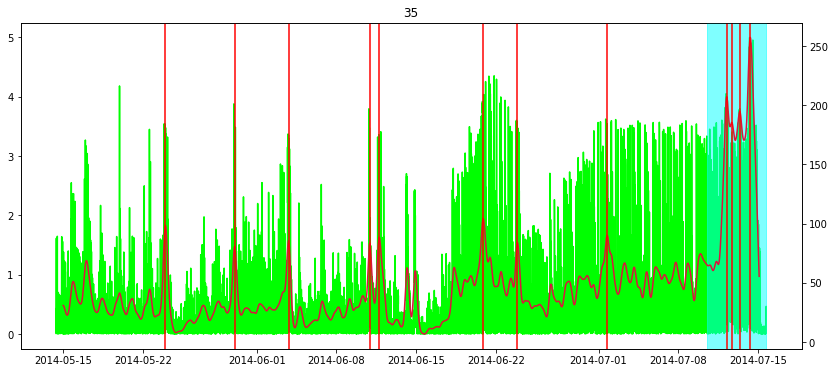

большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды


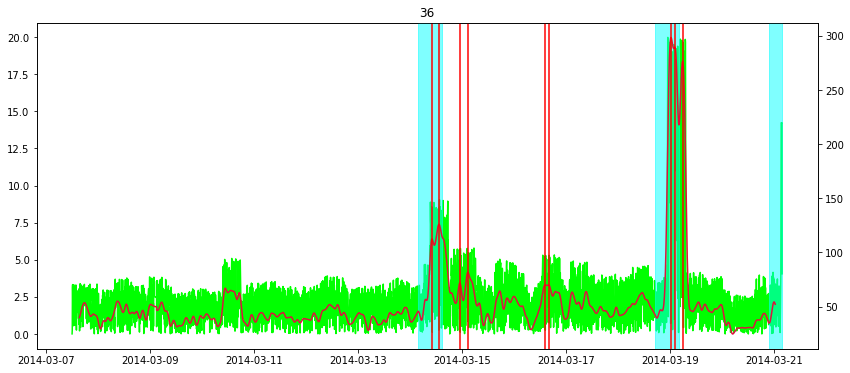

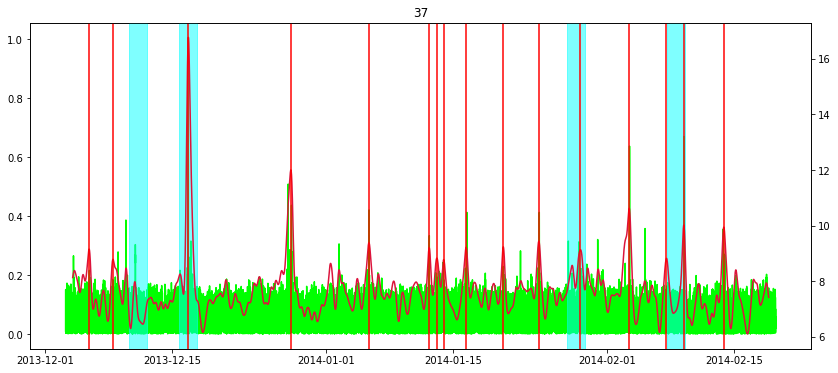

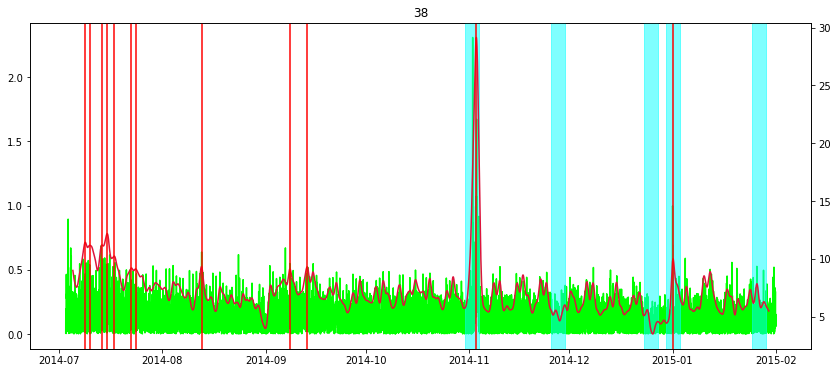

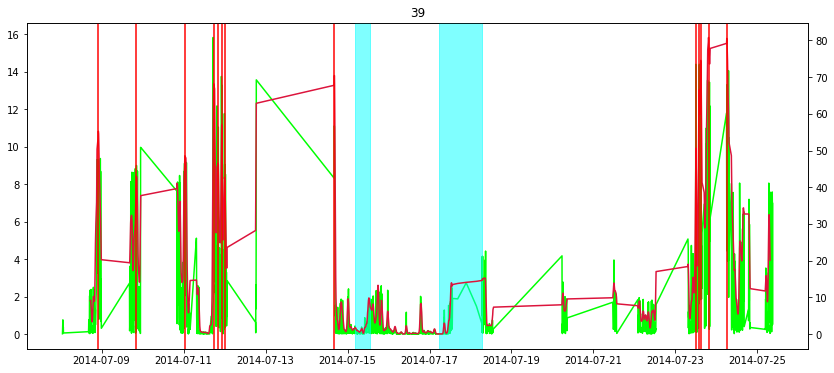

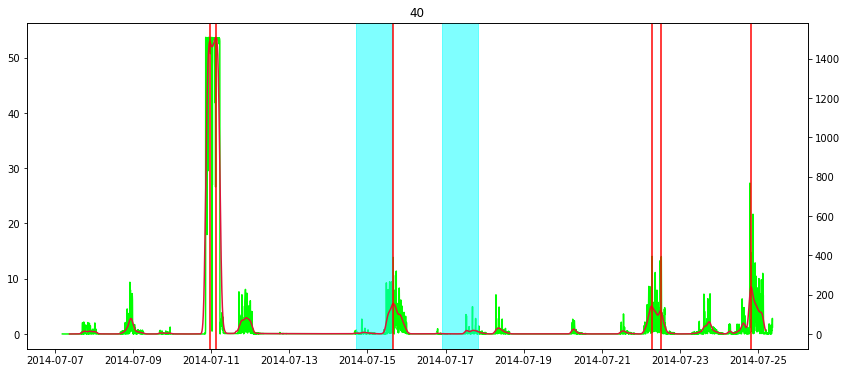

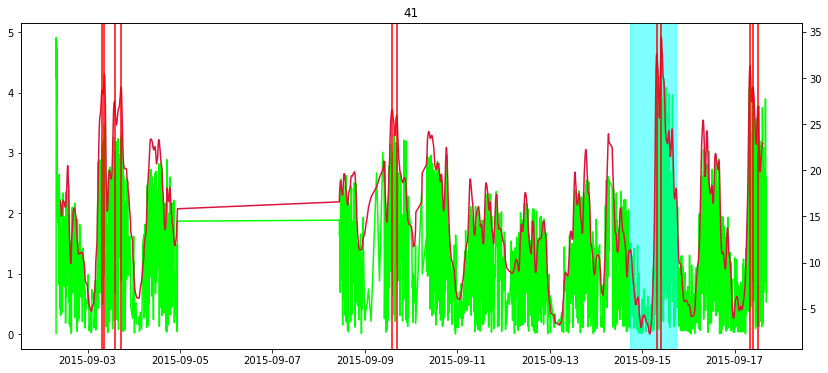

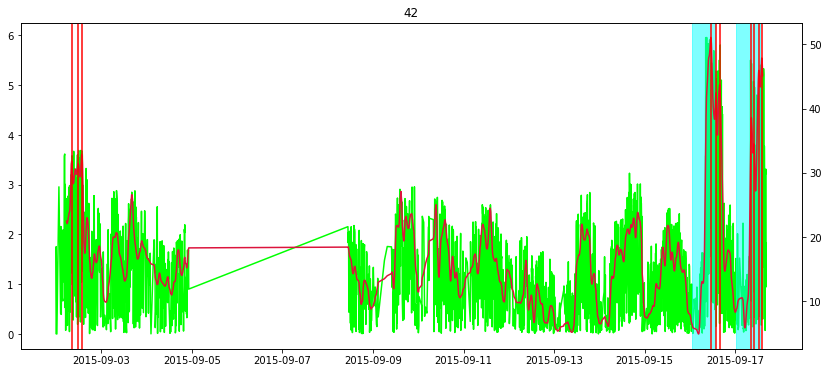

большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды


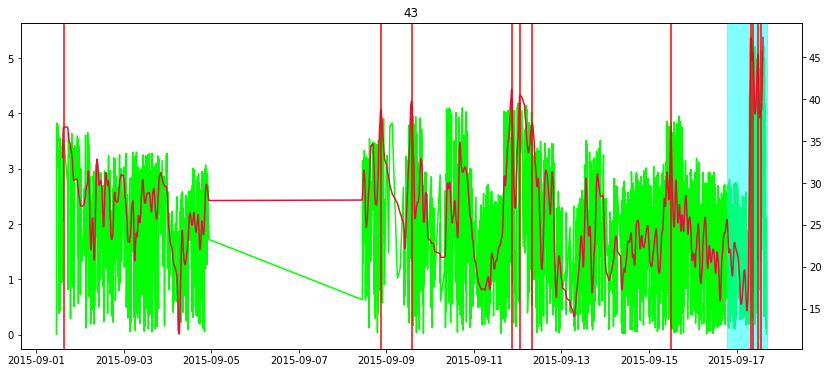

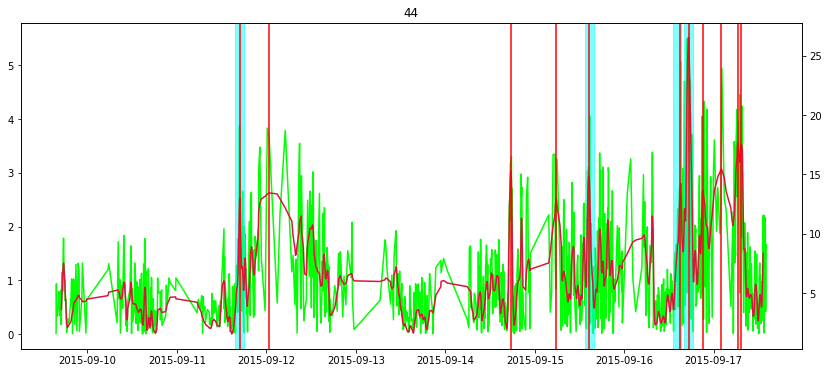

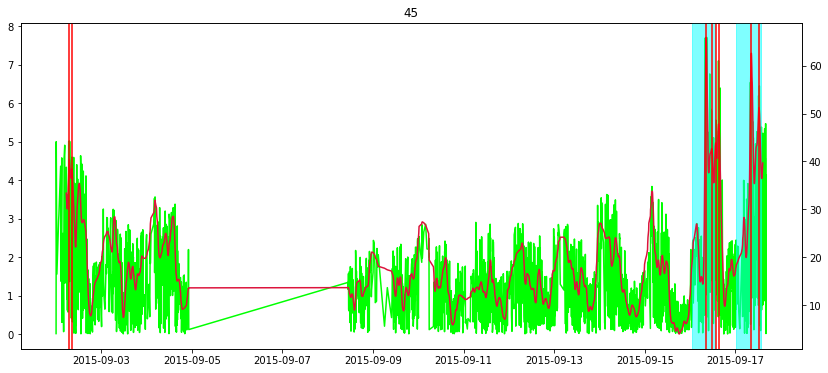

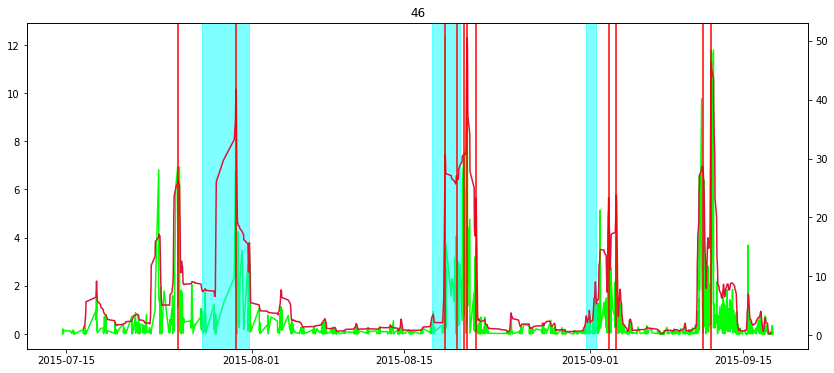

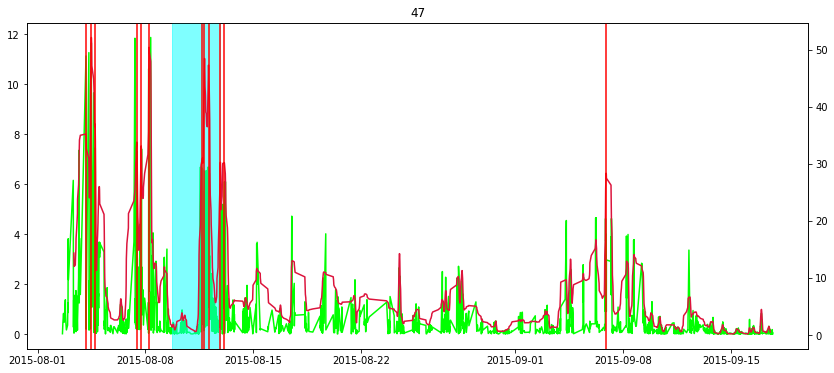

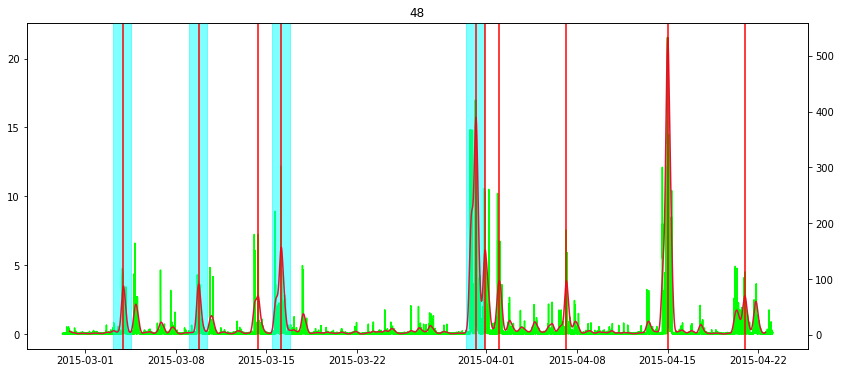

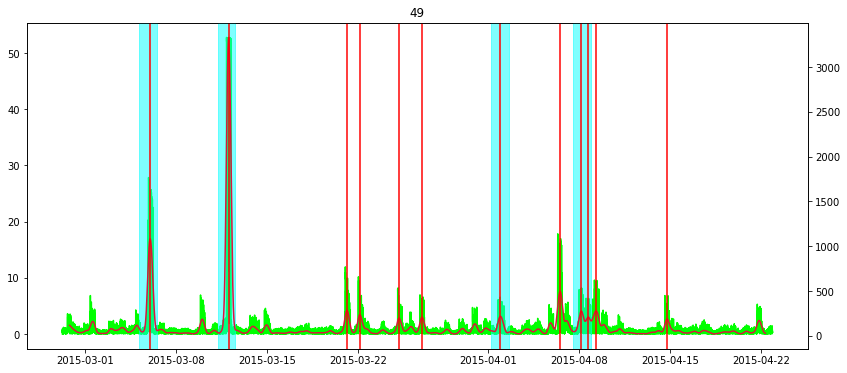

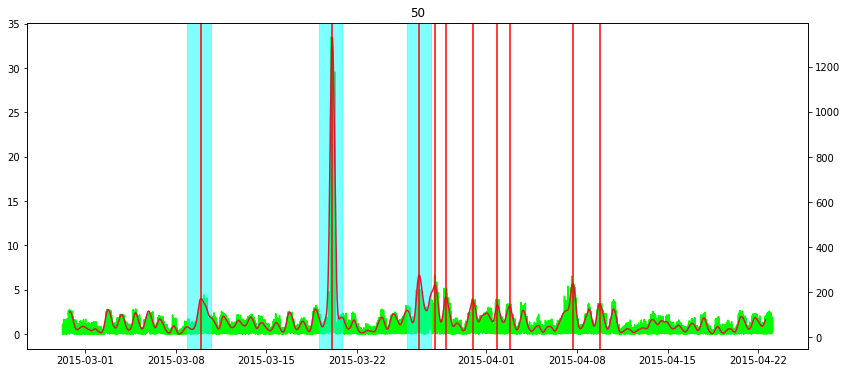

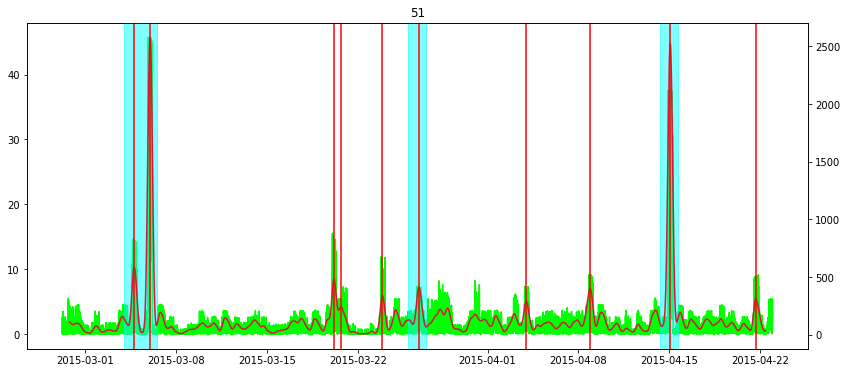

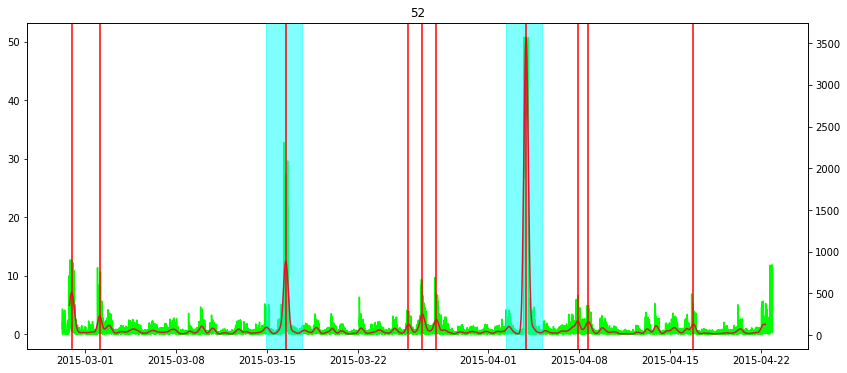

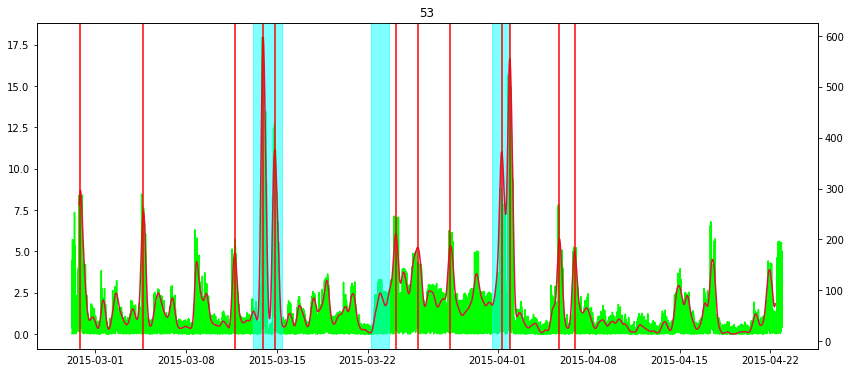

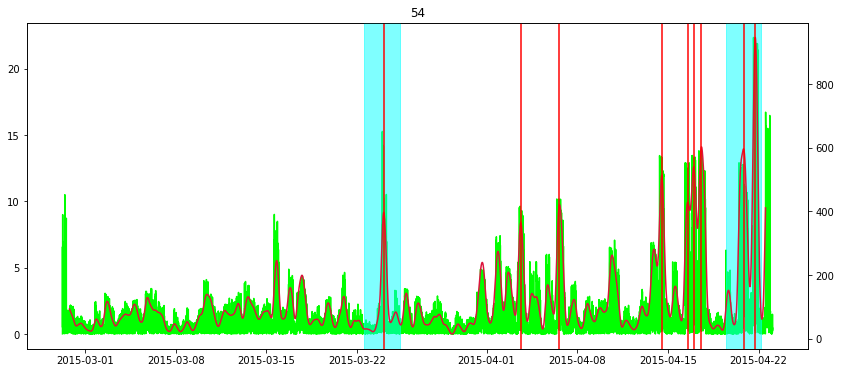

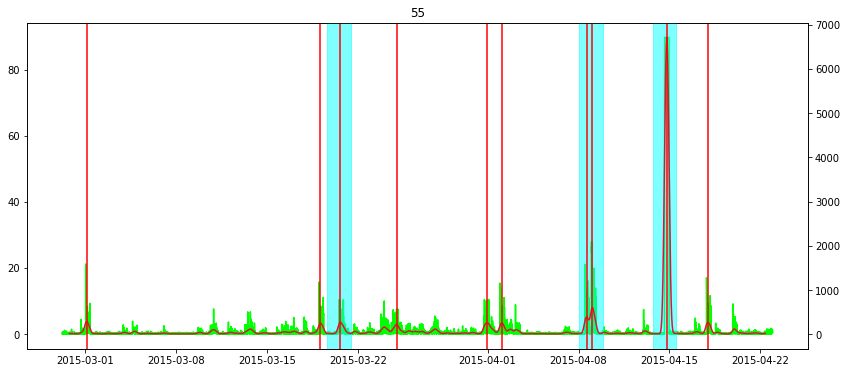

большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды


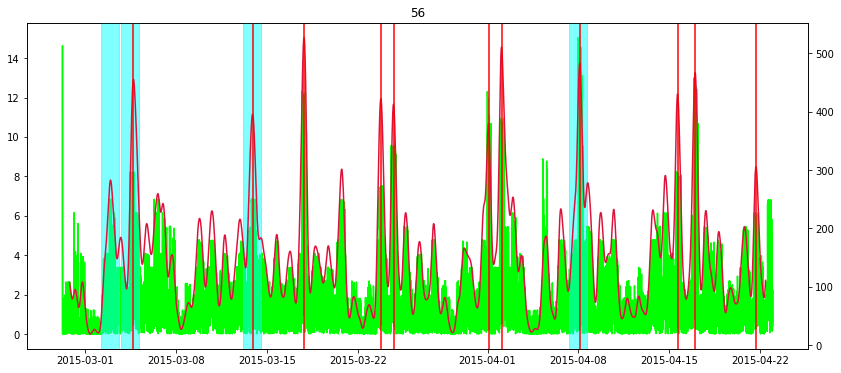

большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды


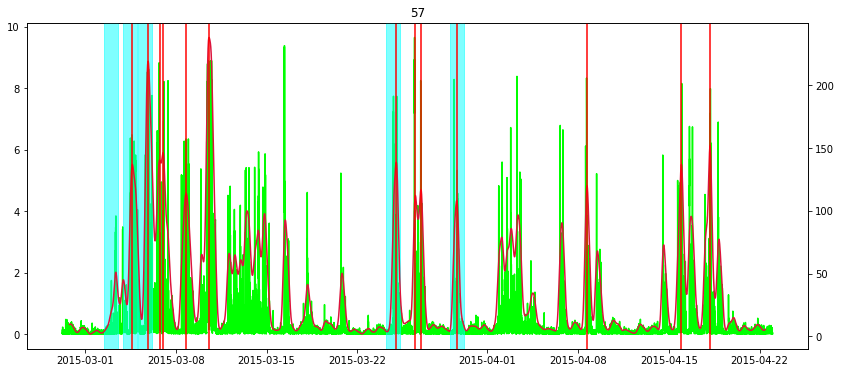

Standart  -  65.02945112584466
LowFP  -  48.10863562697683
LowFN  -  71.22653063562058


<Figure size 1008x432 with 0 Axes>

In [310]:
list_metrics=[]

def norm(x,mu=0,std=1/4.5):
    return np.exp(-1/2*((x-mu)/std)**2) 
my_exp_weighted = lambda arr: np.sum(    norm(np.linspace(-1,1,len(arr)))*np.array(arr)     )


for iii in range(len(all_files)):
    
    
    acci = accidents[all_files[iii][5:].replace('\\','/')]


    df = pd.read_csv(all_files[iii],index_col = 'timestamp', parse_dates=True)
    window = int(len(df)/50)
    
    tensor = list_of_tensor[iii].copy()
    df = pd.DataFrame(tensor.reshape(len(tensor),-1),index=df.index[-len(tensor):])
    metric1 = df.abs().max(axis=1)
    metric2 = metric1.rolling(window, center=True).apply(my_exp_weighted)



    plt.plot(metric1,c='lime')
    ax2 = plt.twinx()
    ax2.plot(metric2,c='crimson')
    for j in range(len(acci)):
        plt.axvspan(acci[j][0],acci[j][1], alpha=0.5, color='aqua')
    
    
    
    metric2 = metric2.drop(metric2[metric2.index.duplicated()].index).copy()
    
    ucl = metric2.sort_values()[int(len(metric2)*9/10)]
    raw_metric = metric2.copy()
    raw_metric[raw_metric<ucl]=0
    list_num_index_of_loc_max = argrelextrema(np.array(raw_metric), np.greater)
    series_of_local_maxima = raw_metric[raw_metric.index[list_num_index_of_loc_max]]
    for add in series_of_local_maxima.index:
        plt.axvline(add,color='r')
    bin_metric = pd.Series(np.zeros(len(metric2)),index=metric2.index)
    bin_metric[series_of_local_maxima.index]=1

    
    a = anomaly_detection([1])
    a.bin_metric=bin_metric.copy()
    a1,a2,a3 = a.evaluate_nab(acci)
    list_metrics.append(np.array([a1,a2,a3]))     
    plt.title(str(iii))
    plt.show()
    plt.figure()
get_score(list_metrics)